In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Wages by Education Dataset

In the following notebook, we will be looking at the data provided by the Wages by Education CSV.  In particular, we are modeling the data relating to men and women.

## Creating Dataframes

In [2]:
data = pd.read_csv('/Users/mattcarey/Documents/UNCC/DTSC/Project Datasets/wages_by_education.csv')

In [3]:
data.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [4]:
data.columns

Index(['year', 'less_than_hs', 'high_school', 'some_college',
       'bachelors_degree', 'advanced_degree', 'men_less_than_hs',
       'men_high_school', 'men_some_college', 'men_bachelors_degree',
       'men_advanced_degree', 'women_less_than_hs', 'women_high_school',
       'women_some_college', 'women_bachelors_degree', 'women_advanced_degree',
       'white_less_than_hs', 'white_high_school', 'white_some_college',
       'white_bachelors_degree', 'white_advanced_degree', 'black_less_than_hs',
       'black_high_school', 'black_some_college', 'black_bachelors_degree',
       'black_advanced_degree', 'hispanic_less_than_hs',
       'hispanic_high_school', 'hispanic_some_college',
       'hispanic_bachelors_degree', 'hispanic_advanced_degree',
       'white_men_less_than_hs', 'white_men_high_school',
       'white_men_some_college', 'white_men_bachelors_degree',
       'white_men_advanced_degree', 'black_men_less_than_hs',
       'black_men_high_school', 'black_men_some_college',
   

In [5]:
#Create the dataframe for data representing men
men_data = data[['year', 'men_less_than_hs', 'men_high_school', 'men_some_college', 'men_bachelors_degree', 'men_advanced_degree']]

In [6]:
men_data.head()

,year,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree
0,2022,17.99,24.08,27.96,49.01,63.51
1,2021,18.34,24.36,27.96,47.83,63.52
2,2020,18.76,25.09,28.55,48.15,62.70
3,2019,17.55,23.99,26.99,45.74,59.93
4,2018,17.70,23.72,26.61,44.97,59.73


In [7]:
#Create the dataframe for data representing women
women_data = data[['year', 'women_less_than_hs', 'women_high_school', 'women_some_college', 'women_bachelors_degree', 'women_advanced_degree']]

In [8]:
women_data.head()

,year,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree
0,2022,14.33,18.93,21.76,34.39,44.34
1,2021,14.36,19.36,21.97,35.08,44.80
2,2020,14.40,19.35,22.35,35.41,46.04
3,2019,13.96,18.48,21.09,33.80,44.22
4,2018,13.36,18.49,20.91,33.03,43.19


# Less Than High School Education Models

The following section explores the relationship between the wages of men and women with less than a high school degree education. The data includes a representative value for wage by year since 1973.

## Men's Less Than High School Education Linear Regression Model

In [9]:
men_data_model_less_than_hs = smf.ols(formula = "men_less_than_hs ~ year", data = men_data)

In [10]:
men_data_model_results_less_than_hs = men_data_model_less_than_hs.fit()

In [11]:
men_less_than_hs_params =  men_data_model_results_less_than_hs.params

In [12]:
men_data_model_results_less_than_hs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       men_less_than_hs   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.42
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.88e-06
Time:                        21:21:47   Log-Likelihood:                -83.179
No. Observations:                  50   AIC:                             170.4
Df Residuals:                      48   BIC:                             174.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    155.9620     25.517      6.112      0.000     104.657     207.267
year          -0.0693      0.013     -5.424      0.000      -0.095      -0.044
==============================================================================
Omnibus:                        1.958   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.352
Skew:                           0.147   Prob(JB):                        0.509
Kurtosis:                       2.250   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

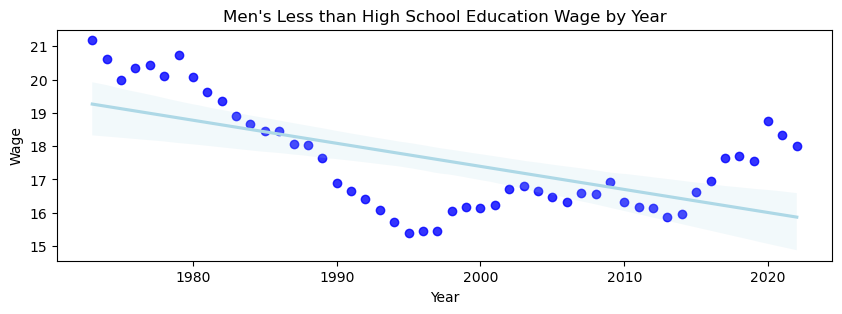

In [13]:
# Regression Plot
plt.figure(figsize=(10, 3))
sns.regplot(x="year", y="men_less_than_hs", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "lightblue"})
plt.title("Men's Less than High School Education Wage by Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Women's Less than High School Linear Regression Model 

In [14]:
women_data_model_less_than_hs = smf.ols(formula = "women_less_than_hs ~ year", data = women_data)

In [15]:
women_data_model_results_less_than_hs = women_data_model_less_than_hs.fit()

In [16]:
women_less_than_hs_params =  women_data_model_results_less_than_hs.params

In [17]:
women_data_model_results_less_than_hs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     women_less_than_hs   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     9.671
Date:                Sat, 09 Dec 2023   Prob (F-statistic):            0.00315
Time:                        21:22:26   Log-Likelihood:                -37.365
No. Observations:                  50   AIC:                             78.73
Df Residuals:                      48   BIC:                             82.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.8889     10.207     -1.851      0.070     -39.411       1.634
year           0.0159      0.005      3.110      0.003       0.006       0.026
==============================================================================
Omnibus:                        2.104   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.689
Skew:                           0.450   Prob(JB):                        0.430
Kurtosis:                       2.968   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

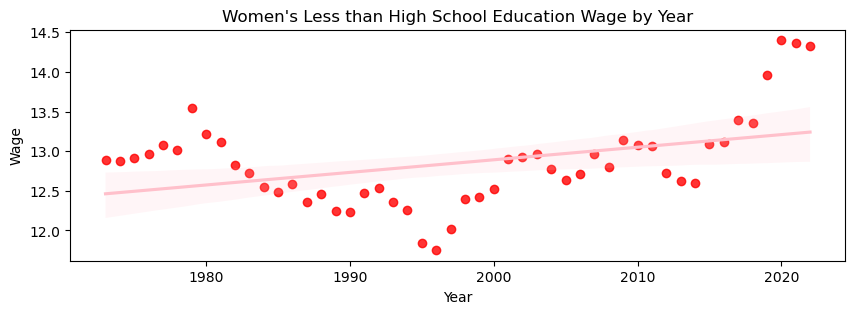

In [18]:
# Regression Plot
plt.figure(figsize=(10, 3))
sns.regplot(x="year", y="women_less_than_hs", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"})
plt.title("Women's Less than High School Education Wage by Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Combined Less than High School Linear Regression Models

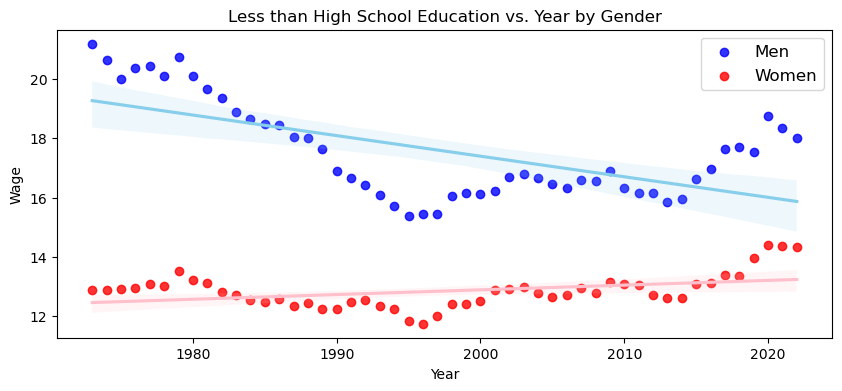

In [19]:
# Regression Plot
plt.figure(figsize=(10, 4))
sns.regplot(x="year", y="men_less_than_hs", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"}, label='Men')
sns.regplot(x="year", y="women_less_than_hs", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"}, label='Women')

plt.title("Less than High School Education vs. Year by Gender")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.legend(fontsize=12)
plt.show()

# High School Graduate Education Models

The following section explores the relationship between the wages of men and women high school graduates. The data includes a representative value for wage by year since 1973.

## Men's High School Graduate Linear Regression Model

In [20]:
men_data_model_high_school = smf.ols(formula = "men_high_school ~ year", data = men_data)

In [21]:
men_data_model_results_high_school = men_data_model_high_school.fit()

In [22]:
men_high_school_params =  men_data_model_results_high_school.params

In [23]:
men_data_model_results_high_school.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        men_high_school   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     20.46
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           4.00e-05
Time:                        21:23:03   Log-Likelihood:                -71.741
No. Observations:                  50   AIC:                             147.5
Df Residuals:                      48   BIC:                             151.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.6524     20.299      5.697      0.000      74.838     156.467
year          -0.0460      0.010     -4.523      0.000      -0.066      -0.026
==============================================================================
Omnibus:                        0.307   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.488
Skew:                           0.018   Prob(JB):                        0.783
Kurtosis:                       2.517   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

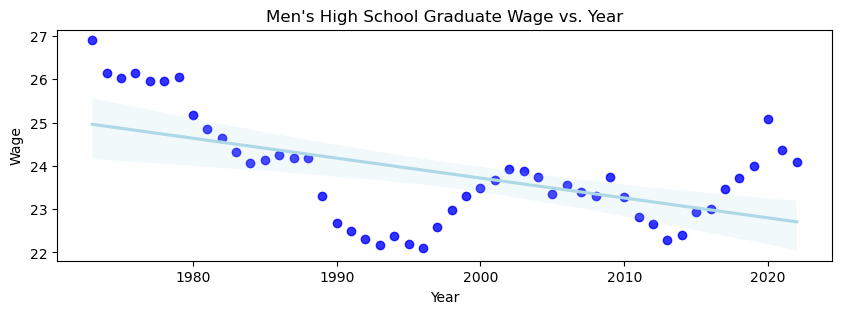

In [24]:
# Regression Plot
plt.figure(figsize=(10, 3))
sns.regplot(x="year", y="men_high_school", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "lightblue"})
plt.title("Men's High School Graduate Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Women's High School Graduate Linear Regression Model

In [25]:
women_data_model_high_school = smf.ols(formula = "women_high_school ~ year", data = women_data)

In [26]:
women_data_model_results_high_school = women_data_model_high_school.fit()

In [27]:
women_high_school_params =  women_data_model_results_high_school.params

In [28]:
women_data_model_results_high_school.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      women_high_school   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     160.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           6.70e-17
Time:                        21:23:15   Log-Likelihood:                -25.904
No. Observations:                  50   AIC:                             55.81
Df Residuals:                      48   BIC:                             59.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.1090      8.116    -10.486      0.000    -101.428     -68.790
year           0.0514      0.004     12.652      0.000       0.043       0.060
==============================================================================
Omnibus:                        3.289   Durbin-Watson:                   0.456
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                2.798
Skew:                           0.473   Prob(JB):                        0.247
Kurtosis:                       2.330   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

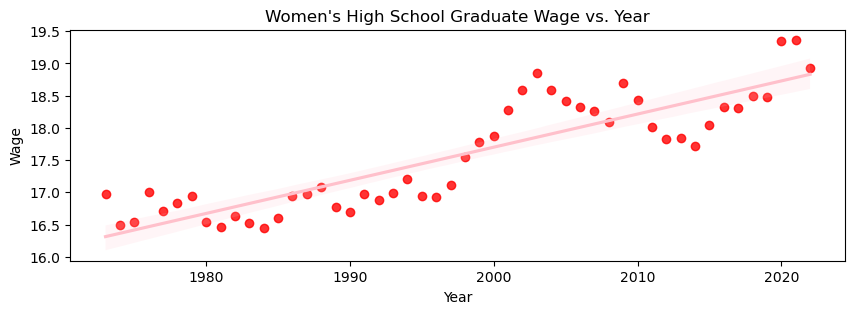

In [29]:
# Regression Plot
plt.figure(figsize=(10, 3))
sns.regplot(x="year", y="women_high_school", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"})
plt.title("Women's High School Graduate Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Combined High School Graduate Linear Regression Models

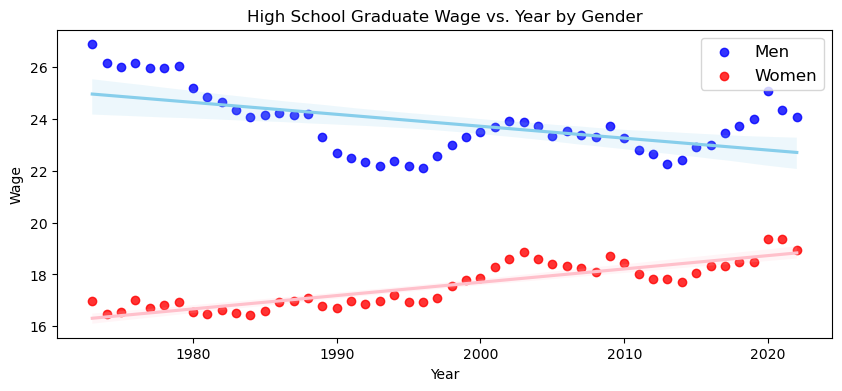

In [256]:
# Regression Plot
plt.figure(figsize=(10, 4))
sns.regplot(x="year", y="men_high_school", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"}, label='Men')
sns.regplot(x="year", y="women_high_school", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"}, label='Women')

plt.title("High School Graduate Wage vs. Year by Gender")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.legend(fontsize=12)
plt.show()

# Some College Education Models

The following section explores the relationship between the wages of men and women with some college education. The data includes a representative value for wage by year since 1973.

## Men's Some College Education Linear Regression Model

In [257]:
men_data_model_some_college = smf.ols(formula = "men_some_college ~ year", data = men_data)

In [258]:
men_data_model_results_some_college = men_data_model_some_college.fit()

In [259]:
men_some_college_params =  men_data_model_results_some_college.params

In [260]:
men_data_model_results_some_college.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       men_some_college   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                  0.003705
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.952
Time:                        00:09:43   Log-Likelihood:                -65.057
No. Observations:                  50   AIC:                             134.1
Df Residuals:                      48   BIC:                             137.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.4148     17.759      1.544      0.129      -8.293      63.123
year          -0.0005      0.009     -0.061      0.952      -0.018       0.017
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.308
Skew:                           0.014   Prob(JB):                        0.857
Kurtosis:                       2.617   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

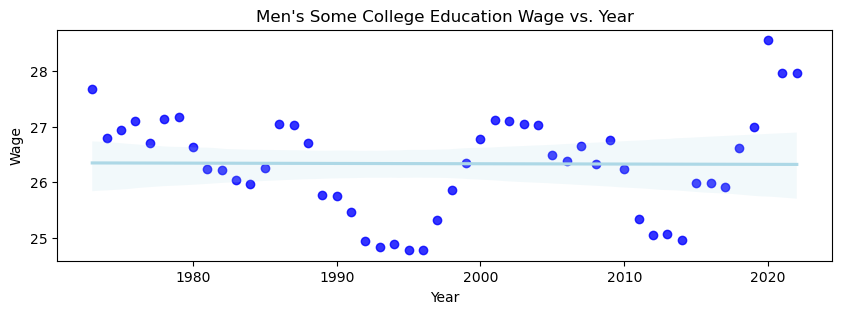

In [261]:
# Regression Plot
plt.figure(figsize=(10, 3))
sns.regplot(x="year", y="men_some_college", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "lightblue"})
plt.title("Men's Some College Education Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Women's Some College Education Linear Regression Model

In [262]:
women_data_model_some_college = smf.ols(formula = "women_some_college ~ year", data = women_data)

In [263]:
women_data_model_results_some_college = women_data_model_some_college.fit()

In [264]:
women_some_college_params =  women_data_model_results_some_college.params

In [265]:
women_data_model_results_some_college.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     women_some_college   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     206.7
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           5.10e-19
Time:                        00:10:07   Log-Likelihood:                -40.979
No. Observations:                  50   AIC:                             85.96
Df Residuals:                      48   BIC:                             89.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -137.8022     10.972    -12.559      0.000    -159.863    -115.741
year           0.0790      0.005     14.377      0.000       0.068       0.090
==============================================================================
Omnibus:                        0.760   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.803
Skew:                           0.270   Prob(JB):                        0.669
Kurtosis:                       2.694   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

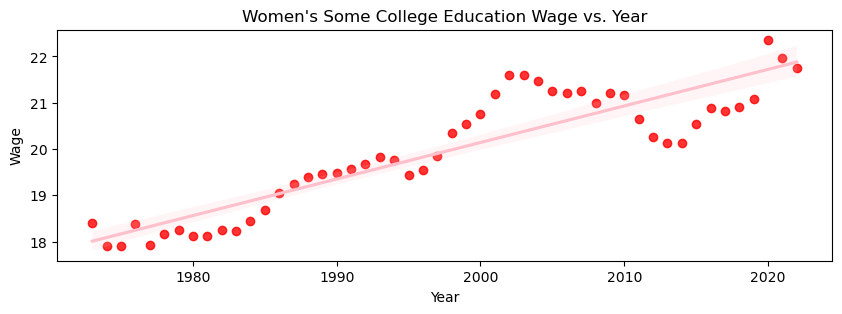

In [266]:
# Regression Plot
plt.figure(figsize=(10, 3))
sns.regplot(x="year", y="women_some_college", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"})
plt.title("Women's Some College Education Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Combined Some College Education Linear Regression Models

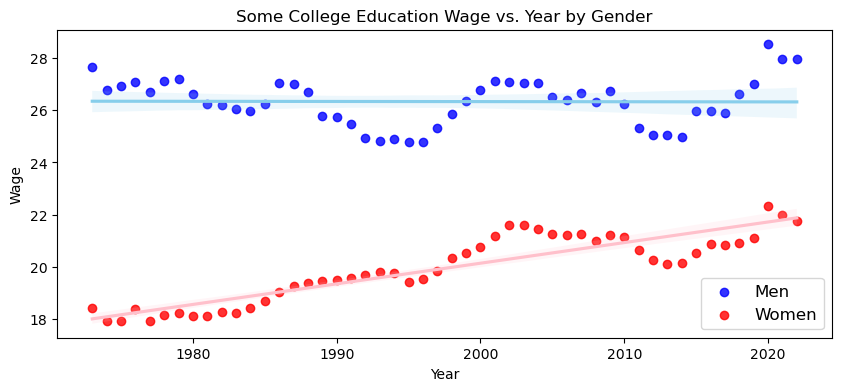

In [267]:
# Regression Plot
plt.figure(figsize=(10, 4))
sns.regplot(x="year", y="men_some_college", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"}, label='Men')
sns.regplot(x="year", y="women_some_college", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"}, label='Women')

plt.title("Some College Education Wage vs. Year by Gender")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.legend(fontsize=12)
plt.show()

# Bachelor's Degree Models

The following section explores the relationship between the wages of men and women with a bachelor's degree. The data includes a representative value for wage by year since 1973.

## Men's Bachelor's Degree Linear Regression Model

In [268]:
men_data_model_bachelors = smf.ols(formula = "men_bachelors_degree ~ year", data = men_data)

In [269]:
men_data_model_results_bachelors = men_data_model_bachelors.fit()

In [270]:
men_bachelors_params =  men_data_model_results_bachelors.params

In [271]:
men_data_model_results_bachelors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     men_bachelors_degree   R-squared:                       0.827
Model:                              OLS   Adj. R-squared:                  0.824
Method:                   Least Squares   F-statistic:                     229.8
Date:                  Fri, 17 Nov 2023   Prob (F-statistic):           6.26e-20
Time:                          00:10:39   Log-Likelihood:                -92.432
No. Observations:                    50   AIC:                             188.9
Df Residuals:                        48   BIC:                             192.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -425.4996     30.704    -13.858      0.000    -487.235    -363.765
year           0.2330      0.015     15.161      0.000       0.202       0.264
==============================================================================
Omnibus:                        0.257   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.447
Skew:                           0.089   Prob(JB):                        0.800
Kurtosis:                       2.572   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

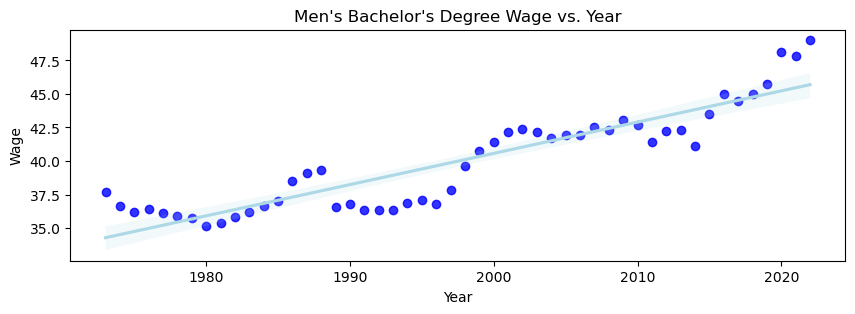

In [272]:
# Regression Plot
plt.figure(figsize=(10, 3))
sns.regplot(x="year", y="men_bachelors_degree", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "lightblue"})
plt.title("Men's Bachelor's Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Women's Bachelor Degree Linear Regression Model

In [273]:
women_data_model_bachelors = smf.ols(formula = "women_bachelors_degree ~ year", data = women_data)

In [274]:
women_data_model_results_bachelors = women_data_model_bachelors.fit()

In [275]:
women_bachelors_params =  women_data_model_results_bachelors.params

In [276]:
women_data_model_results_bachelors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     women_bachelors_degree   R-squared:                       0.919
Model:                                OLS   Adj. R-squared:                  0.917
Method:                     Least Squares   F-statistic:                     543.8
Date:                    Fri, 17 Nov 2023   Prob (F-statistic):           7.84e-28
Time:                            00:10:59   Log-Likelihood:                -73.871
No. Observations:                      50   AIC:                             151.7
Df Residuals:                          48   BIC:                             155.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -465.0302     21.183    -21.953      0.000    -507.621    -422.440
year           0.2473      0.011     23.320      0.000       0.226       0.269
==============================================================================
Omnibus:                        2.164   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                2.031
Skew:                           0.413   Prob(JB):                        0.362
Kurtosis:                       2.459   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

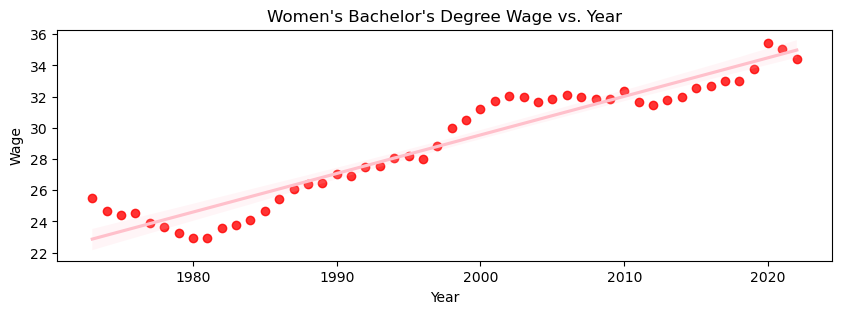

In [277]:
# Regression Plot
plt.figure(figsize=(10, 3))
sns.regplot(x="year", y="women_bachelors_degree", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"})
plt.title("Women's Bachelor's Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Combined Bachelor's Degree Linear Regression Models

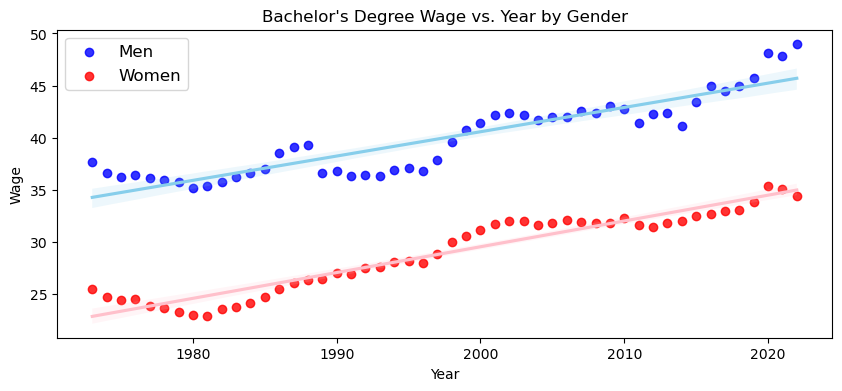

In [278]:
# Regression Plot
plt.figure(figsize=(10, 4))
sns.regplot(x="year", y="men_bachelors_degree", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"}, label='Men')
sns.regplot(x="year", y="women_bachelors_degree", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"}, label='Women')

plt.title("Bachelor's Degree Wage vs. Year by Gender")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.legend(fontsize=12)
plt.show()

# Advanced Degree Models

The following section explores the relationship between the wages of men and women with less than an advanced degree education. The data includes a representative value for wage by year since 1973.

## Men's Advanded Degree Linear Regression Model

In [279]:
men_data_model_advanced = smf.ols(formula = "men_advanced_degree ~ men_advanced_degree", data = men_data)

In [280]:
men_data_model_results_advanced = men_data_model_advanced.fit()

In [281]:
men_advanced_params =  men_data_model_results_advanced.params

In [282]:
men_data_model_results_advanced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     men_advanced_degree   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 2.215e+30
Date:                 Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                         00:11:24   Log-Likelihood:                 1480.9
No. Observations:                   50   AIC:                            -2958.
Df Residuals:                       48   BIC:                            -2954.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.776e-15   3.36e-14     -0.053      0.958   -6.92e-14    6.57e-14
men_advanced_degree     1.0000   6.72e-16   1.49e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        4.436   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.895
Skew:                          -0.596   Prob(JB):                        0.143
Kurtosis:                       2.331   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

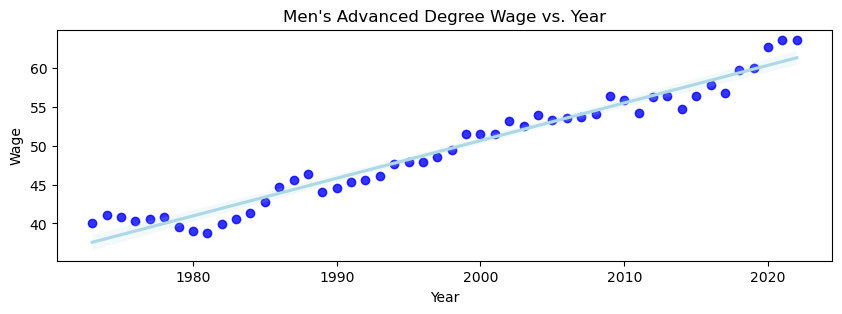

In [283]:
# Regression Plot
plt.figure(figsize=(10, 3))
sns.regplot(x="year", y="men_advanced_degree", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "lightblue"})
plt.title("Men's Advanced Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Women's Advanced Degree Linear Regression Model

In [284]:
women_data_model_advanced = smf.ols(formula = "women_advanced_degree ~ year", data = women_data)

In [285]:
women_data_model_results_advanced = women_data_model_advanced.fit()

In [286]:
women_advanced_params =  women_data_model_results_advanced.params

In [287]:
women_data_model_results_advanced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     women_advanced_degree   R-squared:                       0.908
Model:                               OLS   Adj. R-squared:                  0.906
Method:                    Least Squares   F-statistic:                     472.3
Date:                   Fri, 17 Nov 2023   Prob (F-statistic):           1.73e-26
Time:                           00:11:41   Log-Likelihood:                -92.884
No. Observations:                     50   AIC:                             189.8
Df Residuals:                         48   BIC:                             193.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -636.3737     30.983    -20.539      0.000    -698.670    -574.078
year           0.3371      0.016     21.733      0.000       0.306       0.368
==============================================================================
Omnibus:                        0.360   Durbin-Watson:                   0.273
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.533
Skew:                           0.104   Prob(JB):                        0.766
Kurtosis:                       2.539   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

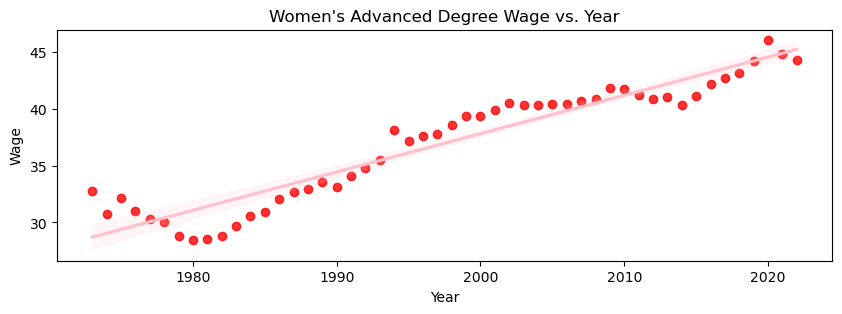

In [288]:
# Regression Plot
plt.figure(figsize=(10, 3))
sns.regplot(x="year", y="women_advanced_degree", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"})
plt.title("Women's Advanced Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Combined Advanced Degree Linear Regression Models

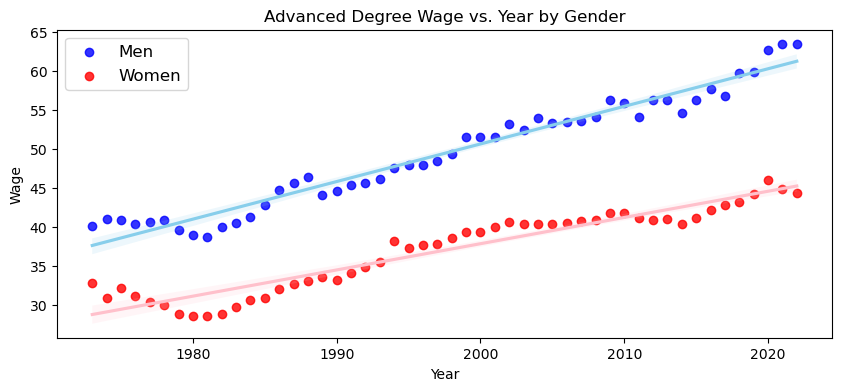

In [289]:
# Regression Plot
plt.figure(figsize=(10, 4))
sns.regplot(x="year", y="men_advanced_degree", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"}, label='Men')
sns.regplot(x="year", y="women_advanced_degree", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"}, label='Women')

plt.title("Advanced Degree Wage vs. Year by Gender")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.legend(fontsize=12)
plt.show()

# Overview of Combined Regression Models by Education Level

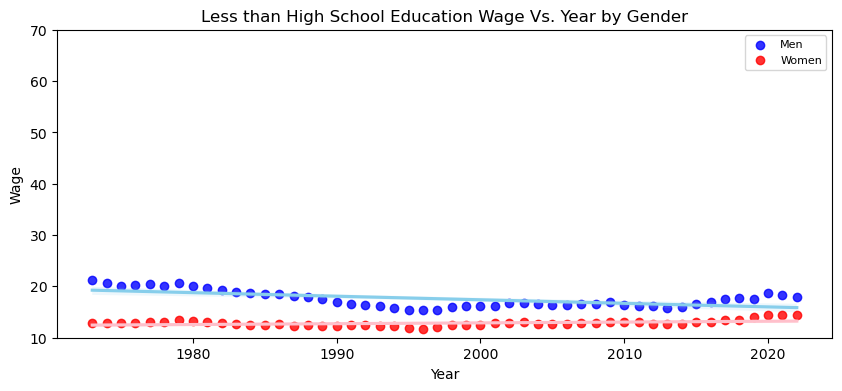

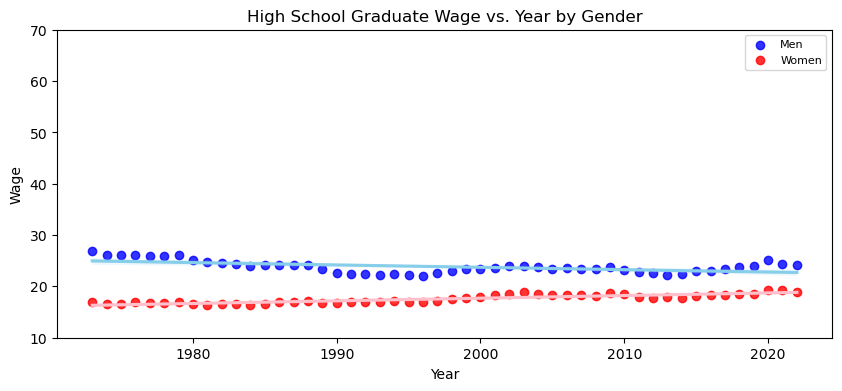

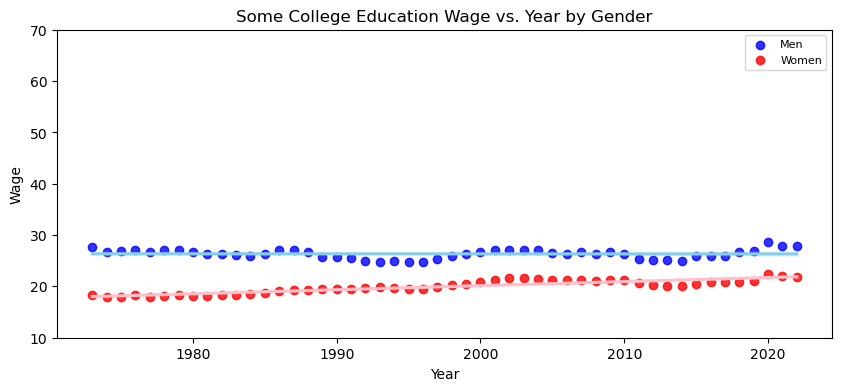

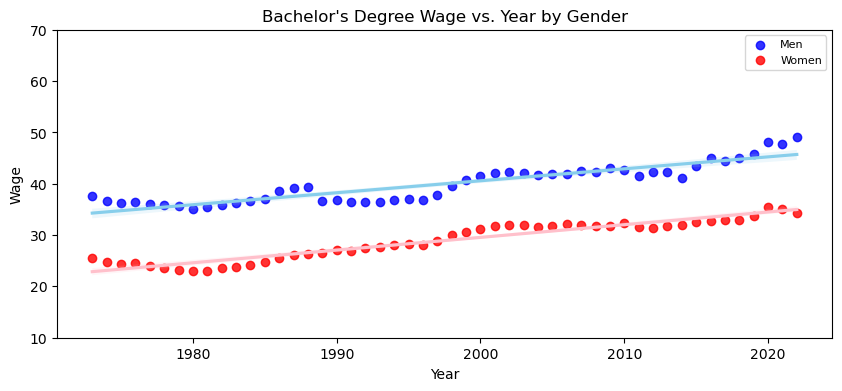

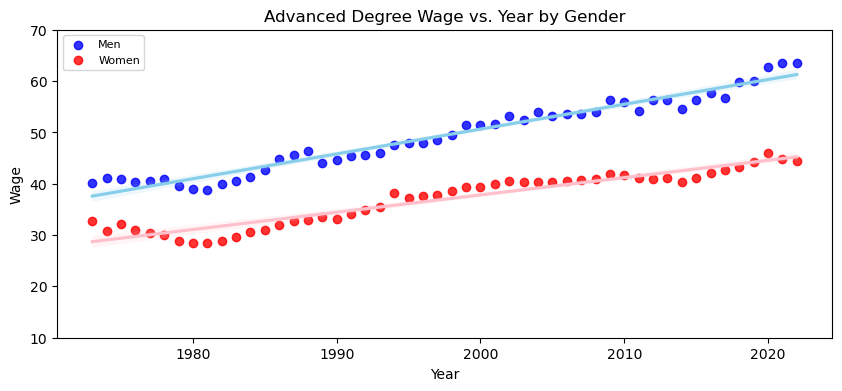

In [290]:
# Regression Plot Less than High School
plt.figure(figsize=(10, 4))
sns.regplot(x="year", y="men_less_than_hs", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"}, label='Men')
sns.regplot(x="year", y="women_less_than_hs", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"}, label ='Women')

plt.title("Less than High School Education Wage Vs. Year by Gender")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.ylim(10,70)
plt.legend(fontsize=8)
plt.show()

# Regression Plot High School Graduate
plt.figure(figsize=(10, 4))
sns.regplot(x="year", y="men_high_school", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"}, label='Men')
sns.regplot(x="year", y="women_high_school", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"}, label = 'Women')

plt.title("High School Graduate Wage vs. Year by Gender")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.ylim(10,70)
plt.legend(fontsize=8)
plt.show()

# Regression Plot Some College
plt.figure(figsize=(10, 4))
sns.regplot(x="year", y="men_some_college", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"}, label = 'Men')
sns.regplot(x="year", y="women_some_college", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"}, label = 'Women')

plt.title("Some College Education Wage vs. Year by Gender")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.ylim(10,70)
plt.legend(fontsize=8)
plt.show()

# Regression Plot Bachelor's Degree
plt.figure(figsize=(10, 4))
sns.regplot(x="year", y="men_bachelors_degree", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"}, label='Men')
sns.regplot(x="year", y="women_bachelors_degree", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"}, label='Women')

plt.title("Bachelor's Degree Wage vs. Year by Gender")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.ylim(10,70)
plt.legend(fontsize=8)
plt.show()

# Regression Plot Advanced Degree
plt.figure(figsize=(10, 4))
sns.regplot(x="year", y="men_advanced_degree", data=men_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"}, label='Men')
sns.regplot(x="year", y="women_advanced_degree", data=women_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"}, label='Women')

plt.title("Advanced Degree Wage vs. Year by Gender")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.ylim(10,70)
plt.legend(fontsize=8)
plt.show()

# Predicting Equality

In this section we will use the generated models to predict when the wage gap will be eradicated.  This will be based on the intersection of the linear models with respect to their education level.

## Function to Find the Intersection of the Models

In [330]:
import shapely
from shapely.geometry import LineString, Point

def calculate_intersect(params1, params2):
    x1 = -100000
    x2 = 100000
    y1_params1 = params1[1] * x1 + params1[0]
    y2_params1 = params1[1] * x2 + params1[0]
    y1_params2 = params2[1] * x1 + params2[0]
    y2_params2 = params2[1] * x2 + params2[0]

    line1 = LineString([[x1, y1_params1], [x2, y2_params1]])
    line2 = LineString([[x1, y1_params2], [x2, y2_params2]])

    intersection = line1.intersection(line2)
    intersection = intersection.x, intersection.y
    print('Point of intersection: (' , intersection[0], ', ' , intersection[1], ')') 

## Less than High School Education Wage Vs. Year by Gender Model Intersection Visualization

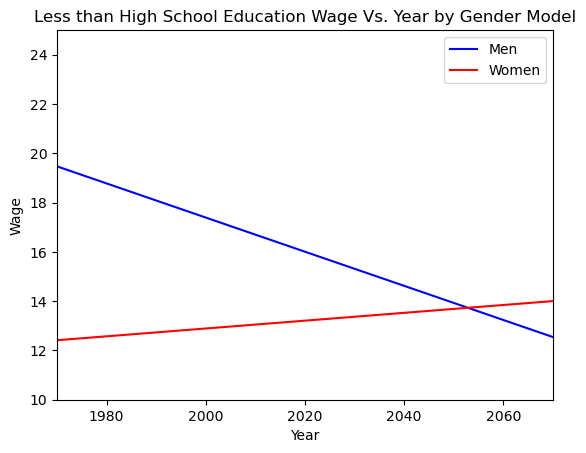

In [331]:
fig, ax = plt.subplots()

ax.axline((0, men_less_than_hs_params[0]), slope=(men_less_than_hs_params[1]), color='blue', label='Men')
ax.axline((0, women_less_than_hs_params[0]), slope=(women_less_than_hs_params[1]), color = 'red', label='Women')
ax.set_xlim(1970,2070)
ax.set_ylim(10,25)
plt.title("Less than High School Education Wage Vs. Year by Gender Model")
plt.xlabel("Year")
plt.ylabel("Wage")
ax.legend(fontsize=10)

In [332]:
calculate_intersect(men_less_than_hs_params, women_less_than_hs_params)

Point of intersection: ( 2052.8425105847964 ,  13.73079448631993 )


## Prediction

The calculated point of intersection shows us that the model predicts the wage gap for people with a high school degree education would be eradicated in 2052.

## High School Education Wage Vs. Year by Gender Model Intersection Visualization

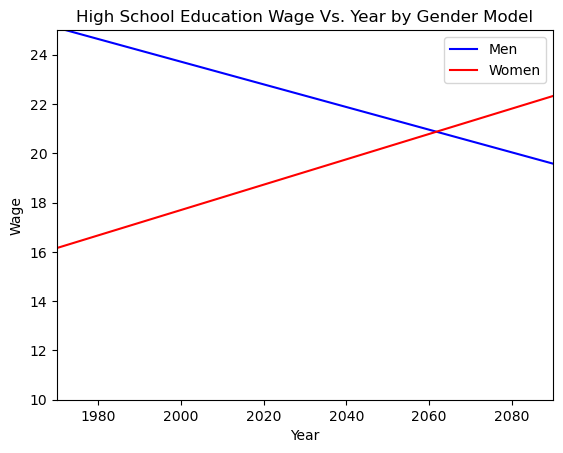

In [333]:
fig, ax = plt.subplots()

ax.axline((0, men_high_school_params[0]), slope=(men_high_school_params[1]), color='blue', label='Men')
ax.axline((0, women_high_school_params[0]), slope=(women_high_school_params[1]), color = 'red', label='Women')
ax.set_xlim(1970,2090)
ax.set_ylim(10,25)
plt.title("High School Education Wage Vs. Year by Gender Model")
plt.xlabel("Year")
plt.ylabel("Wage")
ax.legend(fontsize=10)

In [334]:
calculate_intersect(men_high_school_params, women_high_school_params)

Point of intersection: ( 2061.799858958366 ,  20.876906075146408 )


## Prediction

The calculated point of intersection shows us that the model predicts the wage gap for people with some college education would be eradicated in 2061.

## Bachelor's Degree Education Wage Vs. Year by Gender Model Intersection Visualization

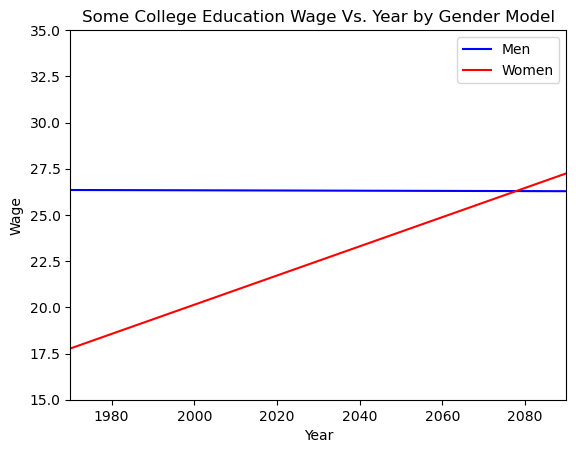

In [335]:
fig, ax = plt.subplots()

ax.axline((0, men_some_college_params[0]), slope=(men_some_college_params[1]), color='blue', label='Men')
ax.axline((0, women_some_college_params[0]), slope=(women_some_college_params[1]), color = 'red', label='Women')
ax.set_xlim(1970,2090)
ax.set_ylim(15,35)
plt.title("Some College Education Wage Vs. Year by Gender Model")
plt.xlabel("Year")
plt.ylabel("Wage")
ax.legend(fontsize=10)

In [336]:
calculate_intersect(men_some_college_params, women_some_college_params)

Point of intersection: ( 2077.872162333539 ,  26.29030447685442 )


## Prediction

The calculated point of intersection shows us that the model predicts the wage gap for people with a bachelor's degree education would be eradicated in 2077.

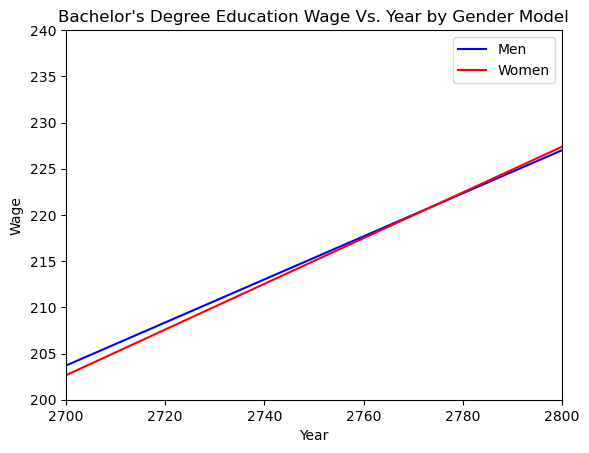

In [337]:
fig, ax = plt.subplots()

ax.axline((0, men_bachelors_params[0]), slope=(men_bachelors_params[1]), color='blue', label='Men')
ax.axline((0, women_bachelors_params[0]), slope=(women_bachelors_params[1]), color = 'red', label='Women')
ax.set_xlim(2700,2800)
ax.set_ylim(200,240)
plt.title("Bachelor's Degree Education Wage Vs. Year by Gender Model")
plt.xlabel("Year")
plt.ylabel("Wage")
ax.legend(fontsize=10)

In [338]:
calculate_intersect(men_bachelors_params, women_bachelors_params)

Point of intersection: ( 2773.6662735851 ,  220.8625358491031 )


## Prediction

The calculated point of intersection shows us that the model predicts the wage gap for people with an advanced degree education would be eradicated in 2773.  This estimate is too far off in the future for the estimate to be valuable.

## Advanced Degree Information

Currently, the advanced degree modeling illustrates the pay gap increasing between men and women.